# Task 1: Exploratory Data Analysis (EDA)

In [1]:
# Step 1: Load the Mushroom dataset
import pandas as pd

In [2]:
mushroom_data = pd.read_csv("mushroom.csv")

In [3]:
# Step 2: Data Exploration
print(mushroom_data.head())  # Display the first few rows of the dataset

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [4]:
print(mushroom_data.describe())  # Get basic statistics of the dataset

        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054


In [5]:
# Step 3: Feature Distributions
import matplotlib.pyplot as plt

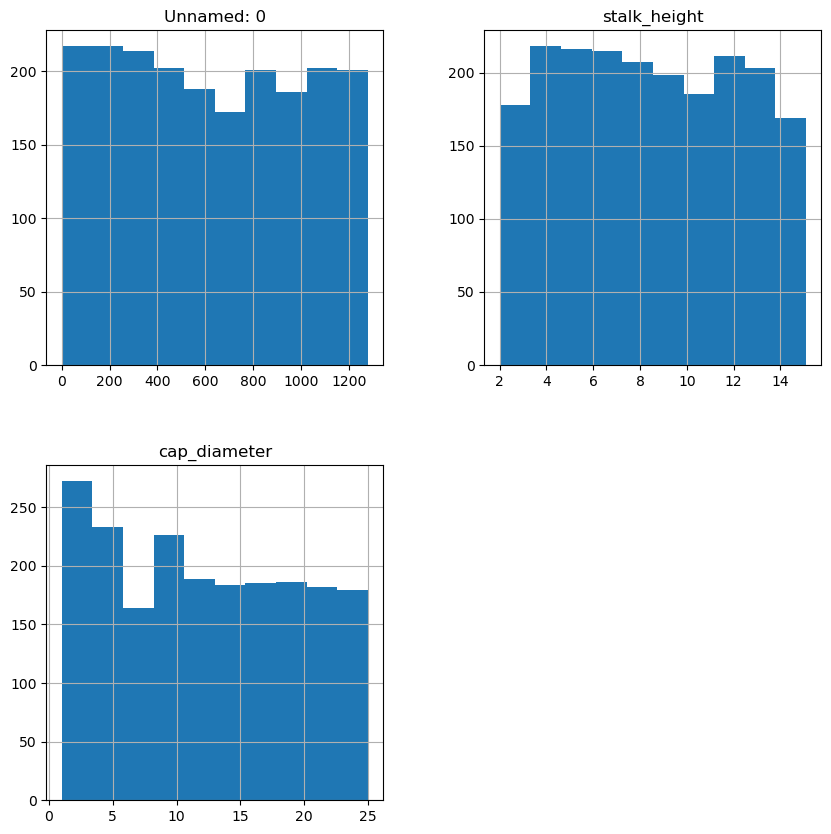

In [6]:
mushroom_data.hist(figsize=(10, 10))  # Plot histograms for all features
plt.show()

# Task 2: Data Preprocessing

In [7]:
# Step 1: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = label_encoder.fit_transform(mushroom_data[column])

In [9]:
# Step 2: Split Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split

In [10]:
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Data Visualization

E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


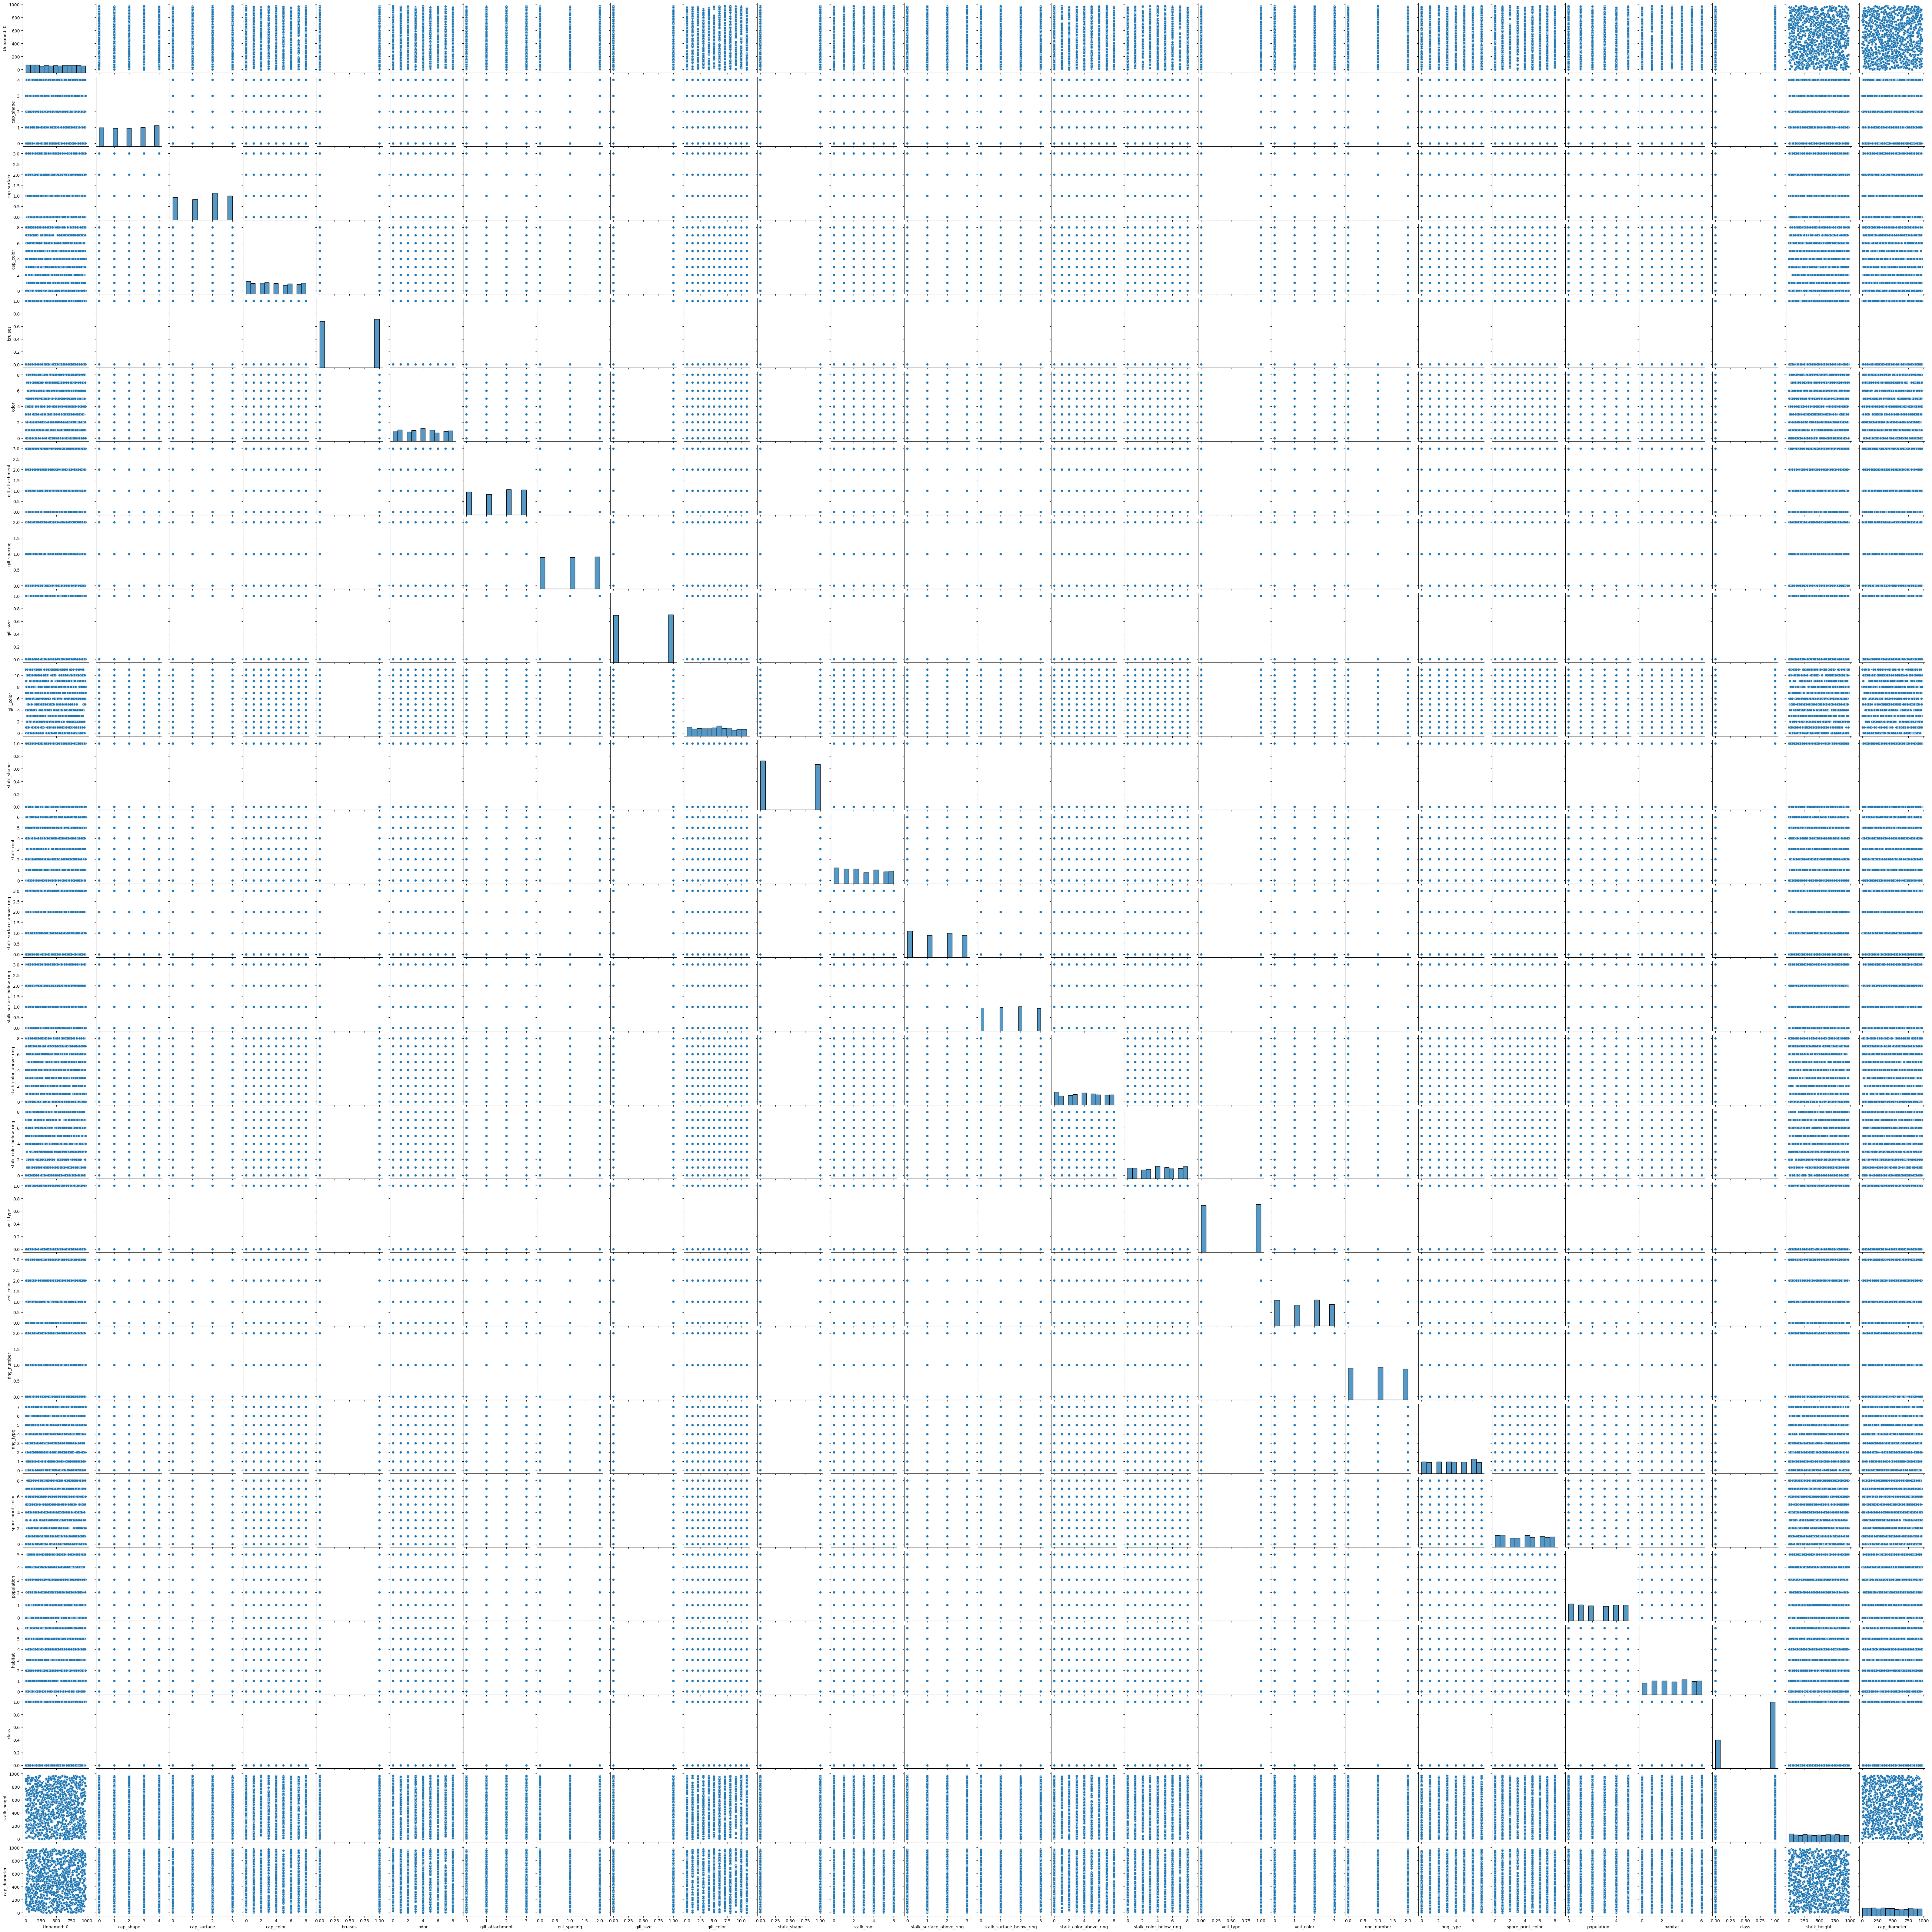

In [12]:
# Step 1: Visualize Feature Distributions and Relationships
import seaborn as sns

sns.pairplot(mushroom_data)
plt.show()

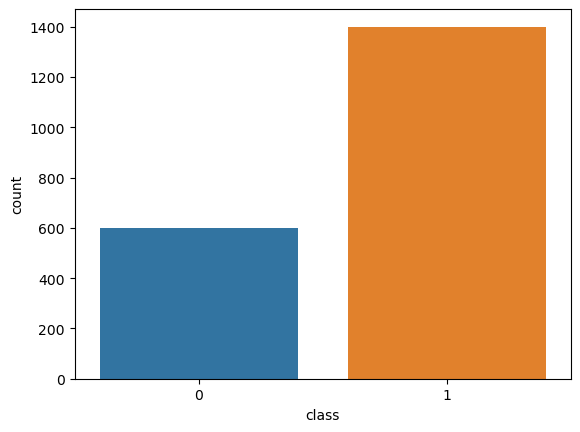

In [13]:
# Step 2: Visualize Class Distribution
sns.countplot(x='class', data=mushroom_data)
plt.show()

# Task 4: SVM Implementation

In [14]:
# Step 1: Implement Basic SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [15]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
# Step 2: Model Evaluation
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Task 5: Visualization of SVM Results

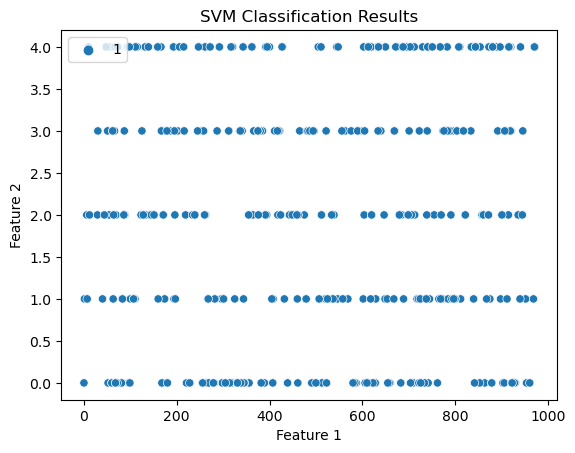

In [17]:
# Visualize Classification Results
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred)
plt.title('SVM Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [18]:
# Step 1: Experiment with different SVM hyperparameters
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.4s


In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

In [ ]:
# Retrain SVM with best parameters
best_svm_model = grid.best_estimator_
best_svm_model.fit(X_train, y_train)

In [ ]:
# Evaluate model performance
y_pred_best = best_svm_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (Best Parameters):", accuracy_best)
print("Classification Report (Best Parameters):\n", classification_report(y_test, y_pred_best))

In [ ]:
# Step 1: Compare SVM performance with different kernels
svm_kernels = ['linear', 'poly', 'rbf']
for kernel in svm_kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred_kernel = svm_model.predict(X_test)
    accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
    print("Kernel:", kernel)
    print("Accuracy:", accuracy_kernel)
    print("Classification Report:\n", classification_report(y_test, y_pred_kernel))
    print()

In [ ]:
# Step 2: Analyze SVM strengths and weaknesses
# - Linear kernel might perform well with high-dimensional datasets like the Mushroom dataset.
# - Polynomial and RBF kernels might capture more complex relationships but could be prone to overfitting.

# Step 3: Discuss practical implications
# - SVM can be used for classification tasks where the decision boundary is not necessarily linear.
# - SVM's ability to handle high-dimensional data and nonlinear relationships makes it suitable for various real-world applications, including image recognition, text classification, and bioinformatics.